In [7]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import tree

In [8]:
# import test and train data
train_f = pd.read_csv('./Data/kc_pp_train_features.csv')
train_l = pd.read_csv('./Data/kc_pp_train_labels.csv')
test_f = pd.read_csv('./Data/kc_pp_test_features.csv')
test_l = pd.read_csv('./Data/kc_pp_test_labels.csv')
train_f = train_f.drop(['date'], axis=1)
test_f = test_f.drop(['date'], axis=1)
train_l = train_l['price']
test_l = test_l['price']
#normalize the prices
train_l = (train_l-train_l.min())/(train_l.max()-train_l.min())
test_l = (test_l-test_l.min())/(test_l.max()-test_l.min())

In [12]:
dtr = DecisionTreeRegressor(random_state=42)
model = dtr.fit(train_f, train_l)
print("Decision tree R^2 Score: ", dtr.score(train_f, train_l))
print("Decision tree R^2 Score: ", dtr.score(test_f, test_l))
y_pred = dtr.predict(test_f)
print("Root Mean Squared Error: ", mean_squared_error(test_l, y_pred, squared=False))
print("Mean Absolute Error: ", mean_absolute_error(test_l, y_pred))
print("Cross Validation Score: ", cross_val_score(dtr, test_f, test_l, cv=5))


Decision tree R^2 Score:  1.0
Decision tree R^2 Score:  0.7135235258367658
Root Mean Squared Error:  0.09293276561784256
Mean Absolute Error:  0.060665244223247594
Cross Validation Score:  [0.68734907 0.67341317 0.66790486 0.67245579 0.67511316]


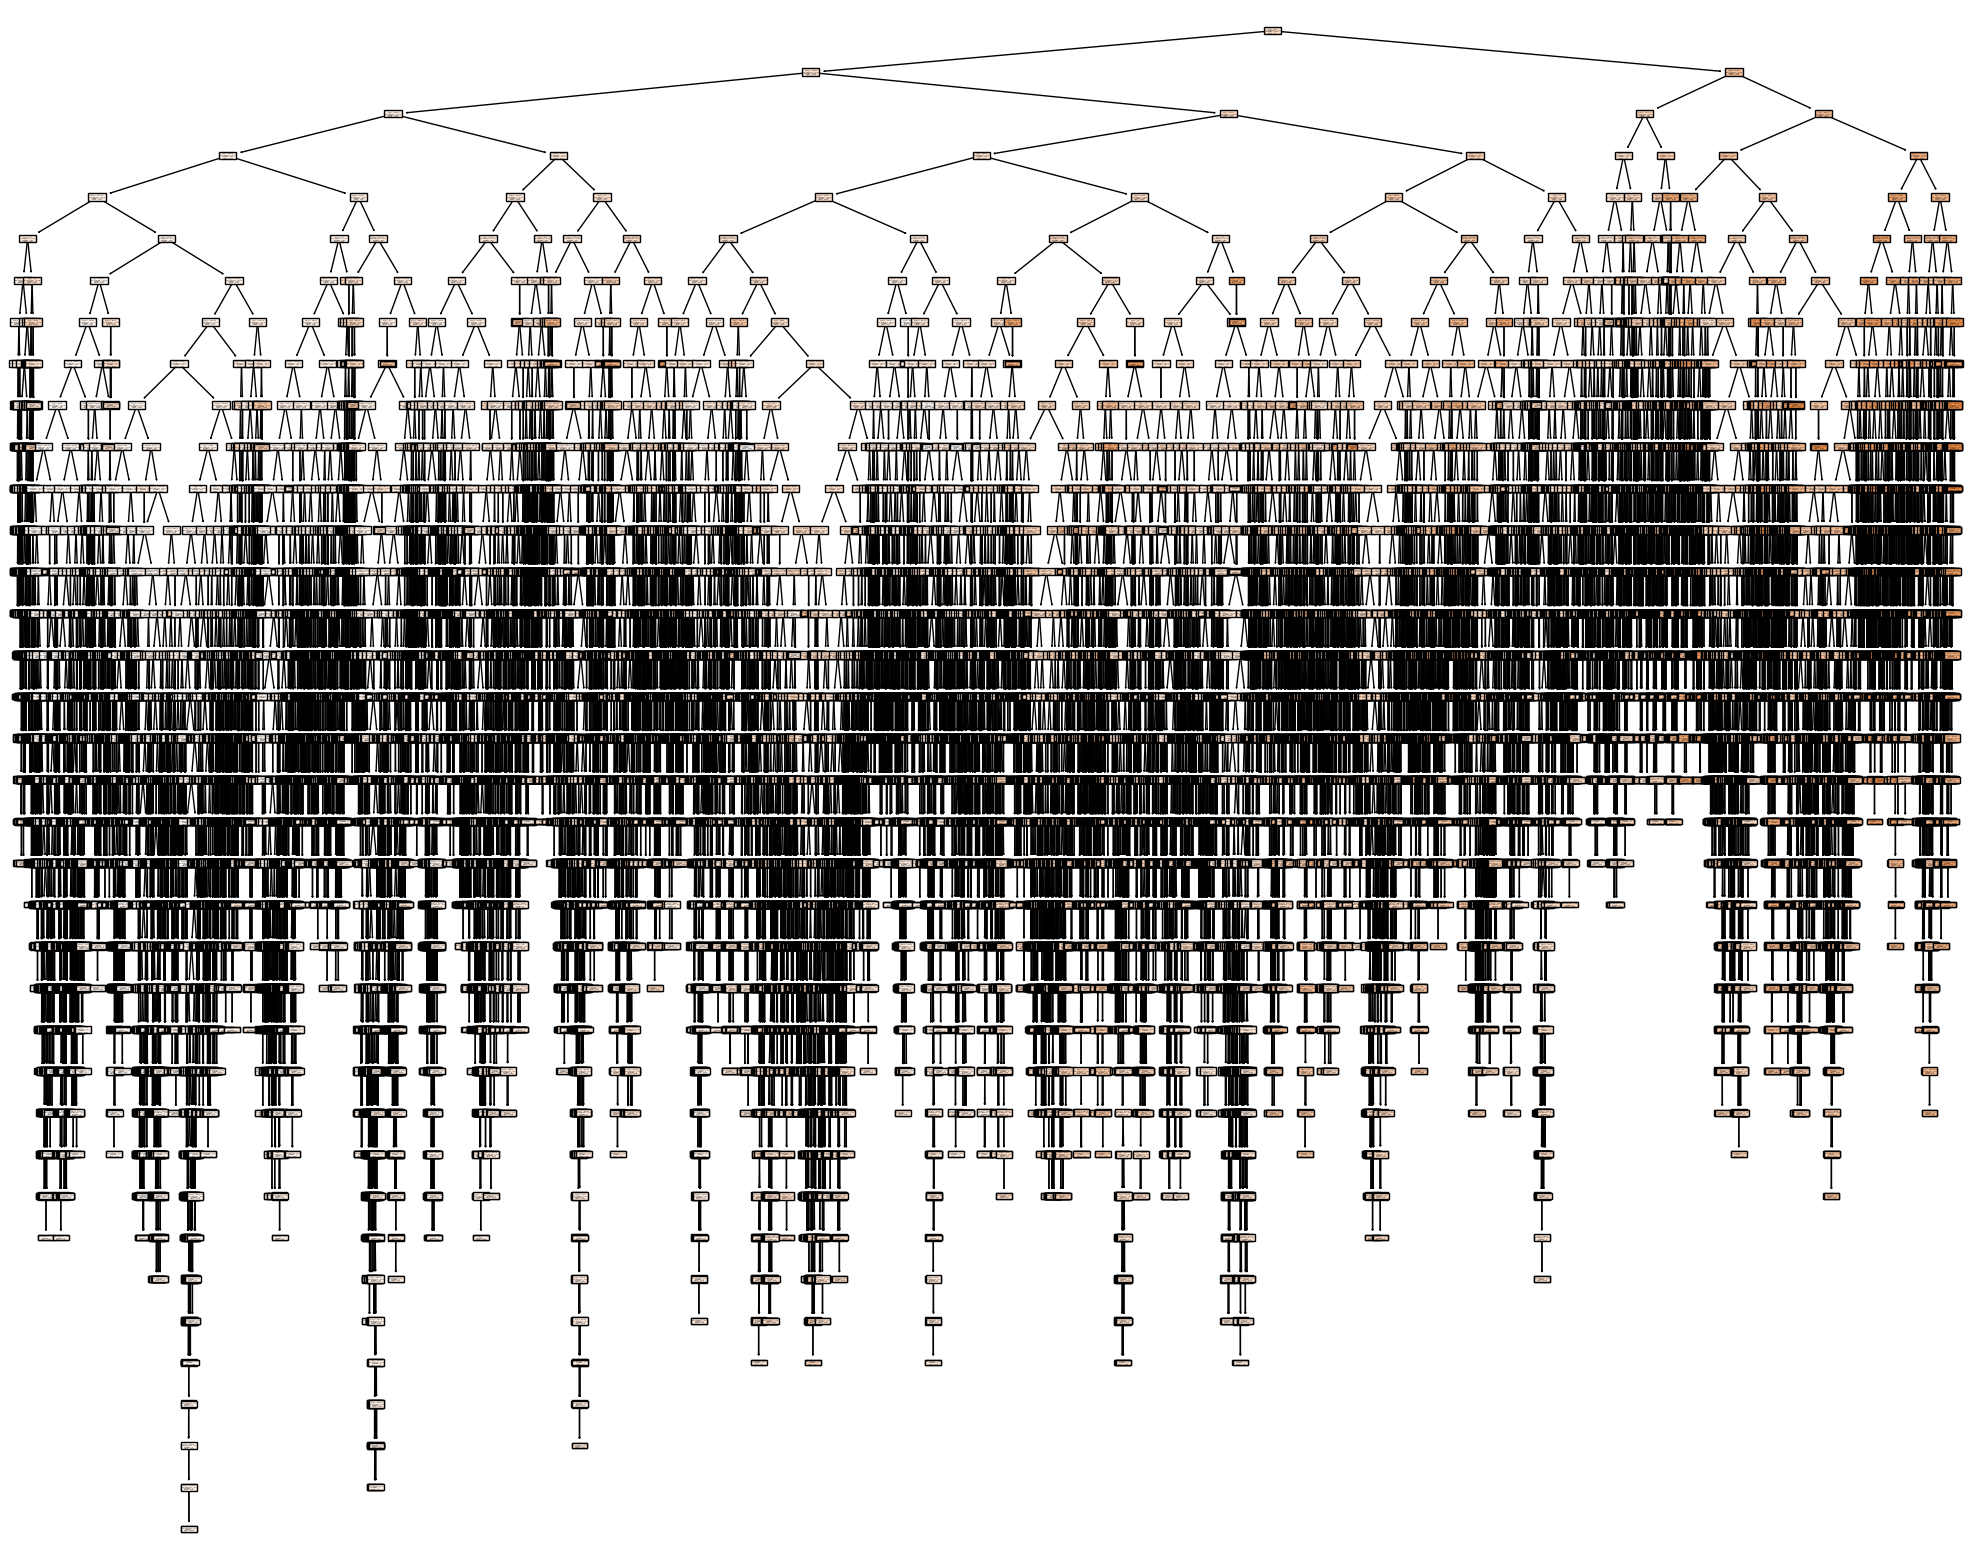

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, filled=True)

In [5]:
fig.savefig("./Images/decision_tree.png")